In [1]:
import networkx as nx
import matplotlib as plt
import numpy as np

## 10. Generacion de grafos

## 10.1. Grafos sinteticos
Los grafos sinteticos son grafos generados de forma artificial, es decir, no representan una base de datos real. Se utilizan para realizar pruebas y experimentos.
### 10.1.1. Grafos aleatorios
Los grafos aleatorios son grafos generados de forma aleatoria. Existen diferentes modelos de generacion de grafos aleatorios, entre los que destacan:

#### 10.1.1.1. Modelo Erdos-Renyi 
Este modelo genera grafos aleatorios con un numero fijo de nodos y una probabilidad fija de que exista una arista entre dos nodos. Para generar un grafo aleatorio con este modelo se utiliza la funcion `erdos_renyi_graph`.  En la funcion tendremos como parametros el numero de nodos y la probabilidad de que exista una arista entre dos nodos.

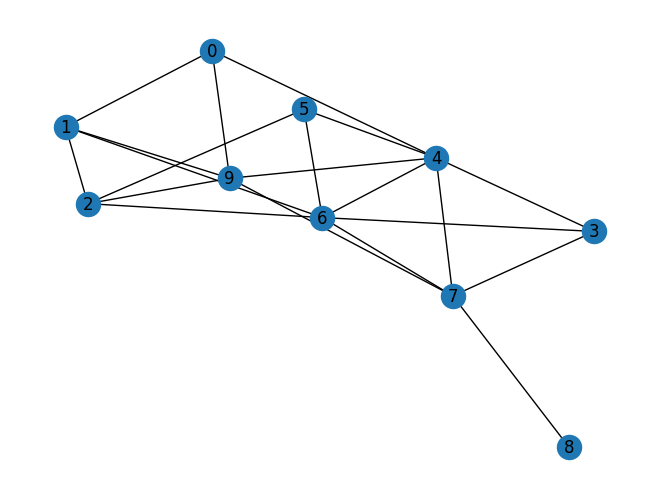

In [2]:
G = nx.erdos_renyi_graph(10, 0.4, seed=1) # 10 nodos, probabilidad de 0.4
nx.draw(G, with_labels=True)

#### 10.1.1.2. Modelo Barabasi-Albert
Este modelo genera grafos aleatorios con un numero fijo de nodos y un numero fijo de aristas que se añaden en cada paso. Para generar un grafo aleatorio con este modelo se utiliza la funcion `barabasi_albert_graph`.  En la funcion tendremos como parametros el numero de nodos y el numero de aristas que se añaden en cada paso.

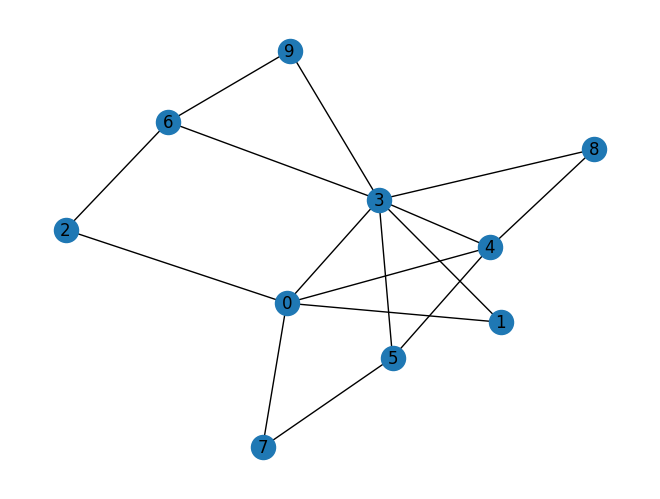

In [3]:
G = nx.barabasi_albert_graph(10, 2, seed=1) # 10 nodos, 2 aristas por paso
nx.draw(G, with_labels=True)

### 10.1.2. Grafo Small World o modelo de Watts-Strogatz 
Este modelo genera grafos aleatorios con un numero fijo de nodos y un numero fijo de aristas que se añaden en cada paso. Para generar un grafo aleatorio con este modelo se utiliza la funcion `watts_strogatz_graph`. En la funcion tendremos como parametros el numero de nodos, el numero de aristas que se añaden en cada paso y la probabilidad de que se añada una arista entre dos nodos que no esten conectados.

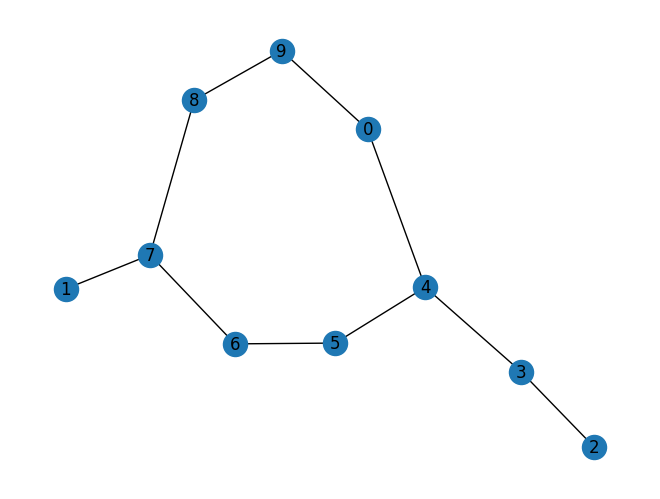

In [4]:
G = nx.watts_strogatz_graph(10, 2, 0.2, seed=1) # 10 nodos, 2 aristas por paso, probabilidad de 0.2
nx.draw(G, with_labels=True)

### 10.1.3. Grafo arbol 
Un arbol es un grafo sin ciclos. Para generar un arbol se utiliza la funcion `random_tree`. En la funcion tendremos como parametro el numero de nodos.

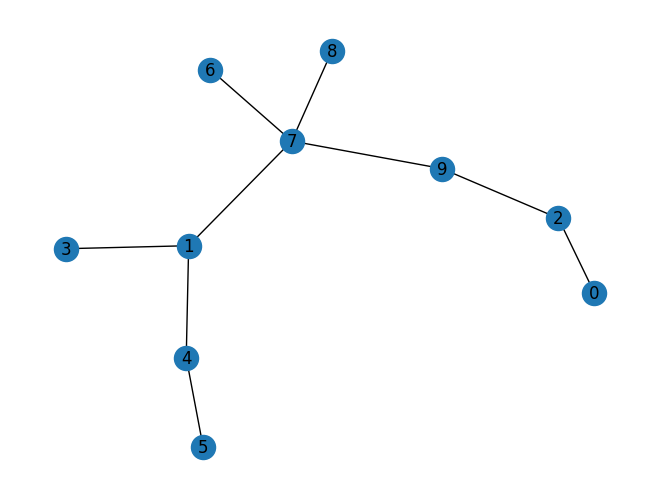

In [5]:
G = nx.random_tree(10, seed=1) # 10 nodos
nx.draw(G, with_labels=True)

### 10.1.4. Modelo Stochastic Block
Este modelo genera grafos aleatorios con un numero fijo de nodos y un numero fijo de bloques y utiliza estas comunidades donde se encontraran los nodos mas conectados entre si. Para generar un grafo aleatorio con este modelo se utiliza la funcion `stochastic_block_model`. En la funcion tendremos como parametros el numero de nodos y una lista con el numero de nodos de cada bloque.

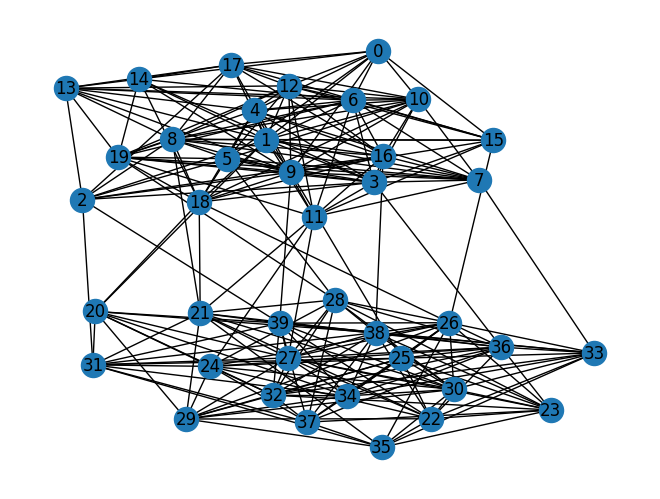

In [6]:
G = nx.stochastic_block_model([20, 20], [[0.6, 0.05], [0.05, 0.6]], seed=1) # 20 nodos por cada bloque, 2 bloques y probabilidades de 0.6 de conexion en el mismo bloque y 0.05 entre bloques diferentes, de esta manera se crean dos comunidades que podemos ver claramente en el grafo
nx.draw(G, with_labels=True)

## 10.2. Propiedades de los grafos
- **Numero de nodos y aristas:** `G.number_of_nodes()`, `G.number_of_edges()` para obtener el numero de nodos y aristas de un grafo.  

- **Esta conectado:** `nx.is_connected(G)` para comprobar si un grafo esta conectado entre todos sus nodos. Ya que podria haber nodos que no esten conectados con el resto.  
  
- **Es ciclico:** `nx.is_directed_acyclic_graph(G)` para comprobar si un grafo no contiene ciclos.
- **Radio y diametro:** `nx.radius(G)`, `nx.diameter(G)` para obtener el radio y el diametro de un grafo. El radio es la menor distancia entre los nodos mas alejados y el diametro es la mayor distancia entre los nodos mas alejados.  
  
- **Grado de un nodo:** `G.degree(nodo)` para obtener el grado de un nodo, es decir, el numero de aristas que conectan con el y `nx.average_degree_connectivity(G)` para obtener el grado medio de los nodos.  
  
- **Distribucion de grado:** `nx.degree_histogram(G)` para obtener la distribucion de grado de un grafo.  
  
- **Media de los caminos mas cortos:** `nx.average_shortest_path_length(G)` para obtener la media de los caminos mas cortos entre todos los nodos.  

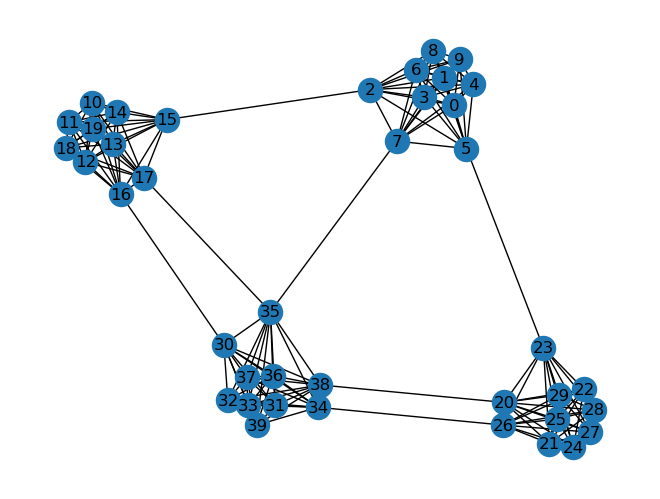

In [25]:
Ex21 = nx.stochastic_block_model([10, 10, 10, 10], [[1, 0.005,0.005, 0.005], [0.005, 1 ,0.005, 0.005],[0.005,0.005 ,1, 0.005],[0.005, 0.005,0.005, 1]], seed=8) 

pos = nx.spring_layout(Ex21,seed=8)
nx.draw(Ex21,pos, with_labels=True)

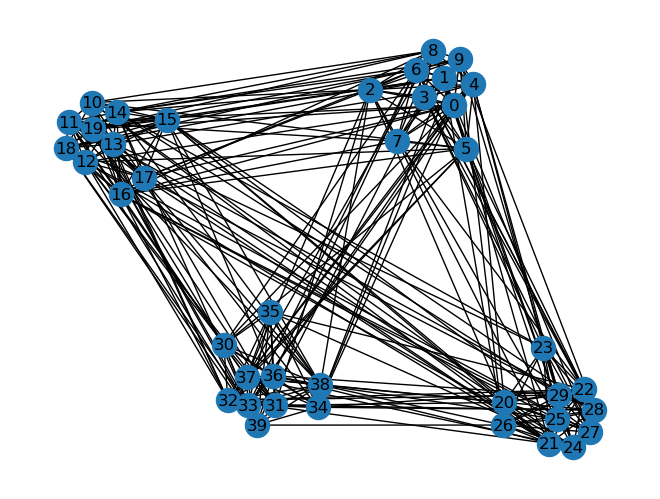

In [23]:
Ex22 = nx.stochastic_block_model([10, 10, 10, 10], [[1, 0.2, 0.2, 0.2], [0.2, 1, 0.2, 0.2],[0.2, 0.2, 1, 0.2],[0.2, 0.2, 0.2, 1]], seed=1) 
nx.draw(Ex22, pos, with_labels=True)

Esta claro que en el primer grafo podemos ver mas claramente que existen 4 bloques de nodos donde no hay conexion entre los distintos bloques, sin embargo, en el segundo grafo vemos que los nodos estan muy interconectectados, se debe a que todos los nodos estan conectados entre si. 
Si los bloques fueran comunidades de personas reales podriamos deducir que en el primer grafo hay 4 comunidades de personas que no se relacionan de comunidad a comunidad pero que dentro de cada comunidad si que se relacionan entre si.
En cambio, en el segundo grafo podriamos decir que todas las personas se relacionan entre si, y pese a que hayamos indicado que hubieran 4 comunidades es totalmente indiferente ya que al estar todos conectados podemos decir que no hay comunidades o que solo hay una que engloba a todas las personas.

## Ejercicio 3

In [17]:
def info_graf(gf):

    print('Number of Nodes and Edges:', gf.number_of_nodes(), 'nodes,', gf.number_of_edges(), 'edges')

    print('Is Connected:', nx.is_connected(gf))

    print('Does Not Have Cycles:', nx.is_directed_acyclic_graph(gf)) 

    try:
        print('Radius and Diameter:', nx.radius(gf), 'radius,', nx.diameter(gf), 'diameter')
    except:
        print('Graph is not connected (no radius or diameter)')
    
    print('Average Degree', nx.average_degree_connectivity(gf))

    print('Degree Distribution: ', nx.degree_histogram(gf))

    try:
        print('Average Shortest Path Length', nx.average_shortest_path_length(gf))
    except:
        print('Graph is not connected (no average shortest path length)')


print('Graph 2.1 \n')
info_graf(Ex21)
print('\n\nGraph 2.2 \n')
info_graf(Ex22)

Graph 2.1 

Number of Nodes and Edges: 40 nodes, 187 edges
Is Connected: True
Does Not Have Cycles: False
Radius and Diameter: 3 radius, 5 diameter
Average Degree {9: 9.382716049382717, 10: 9.366666666666667, 11: 9.454545454545455}
Degree Distribution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 12, 1]
Average Shortest Path Length 2.5474358974358973


Graph 2.2 

Number of Nodes and Edges: 40 nodes, 415 edges
Is Connected: True
Does Not Have Cycles: False
Radius and Diameter: 2 radius, 2 diameter
Average Degree {24: 21.041666666666668, 22: 20.78787878787879, 19: 21.157894736842106, 23: 21.184782608695652, 18: 21.194444444444443, 21: 21.035714285714285, 17: 21.08823529411765, 25: 21.28, 20: 20.8125, 15: 20.466666666666665}
Degree Distribution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 7, 4, 4, 9, 4, 3, 2]
Average Shortest Path Length 1.4679487179487178


Hitting Time: 9.885


''